In [42]:
#loading necessary packages

Source : https://maps.googleapis.com/maps/api/staticmap?center=melbourne&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=melbourne


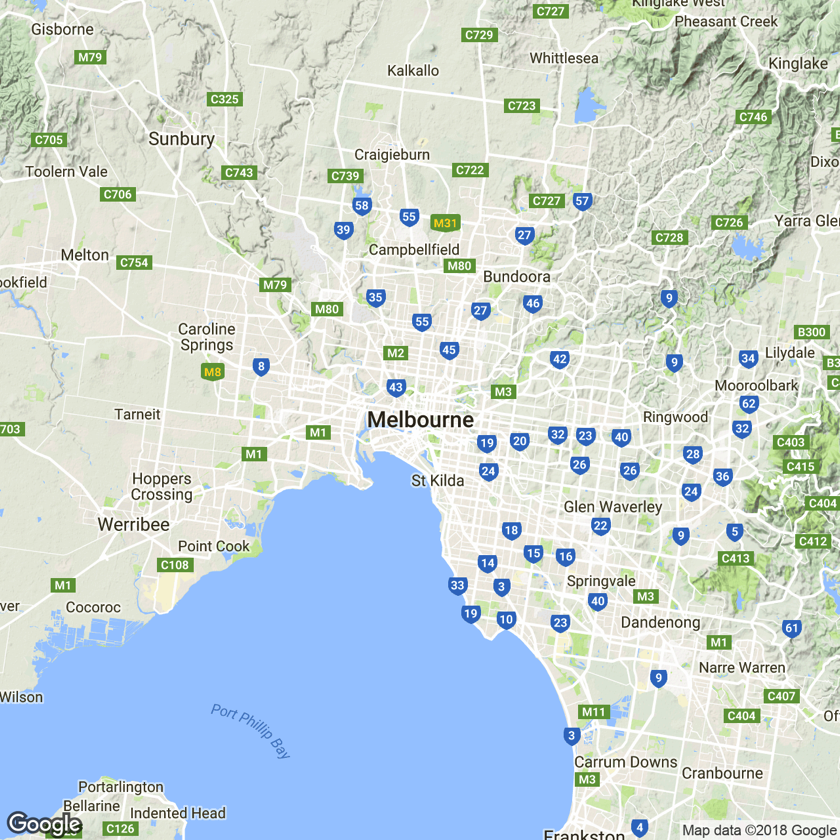

In [210]:
library('ggplot2')
library('ggmap')
qmap(location='melbourne')
library(corrplot)

In [207]:
data=read.csv("~/Aggregated-TAC-Hospitalisation-Stats.csv")

In [208]:
summary(data)

         LGA          dateFrom        dateTo    stayLessEq14    stayGreater14  
 Alpine    :  5   1-Jul-11:79   30-Jun-12:79   Min.   :  1.00   Min.   : 0.00  
 Ararat    :  5   1-Jul-12:79   30-Jun-13:79   1st Qu.: 19.00   1st Qu.: 5.00  
 Ballarat  :  5   1-Jul-13:78   30-Jun-14:78   Median : 46.00   Median : 9.00  
 Banyule   :  5   1-Jul-14:78   30-Jun-15:78   Mean   : 62.82   Mean   :11.64  
 Bass Coast:  5   1-Jul-15:78   30-Jun-16:78   3rd Qu.: 98.00   3rd Qu.:17.00  
 Baw Baw   :  5                                Max.   :302.00   Max.   :48.00  
 (Other)   :362                                                                
      male            female       unknownGender        age0to17     
 Min.   :  0.00   Min.   :  0.00   Min.   :0.00000   Min.   : 0.000  
 1st Qu.:  8.00   1st Qu.: 15.00   1st Qu.:0.00000   1st Qu.: 1.000  
 Median : 20.00   Median : 33.00   Median :0.00000   Median : 3.000  
 Mean   : 31.76   Mean   : 42.62   Mean   :0.07653   Mean   : 4.449  
 3rd Qu.: 

In [ ]:
#making table of unique LGA

In [14]:
data_table=data.frame(table(data$LGA))
data_table$City=paste(data_table$Var1,"Australia")


In [ ]:
#now to get total number of crashes per LGA, assuming that summing the three genders gives total number


In [64]:
which(data$LGA=="Alpine")
sum(data$male[which(data$LGA=="Alpine")])


#which(data$LGA==data_table$Var1[1])

for(i in seq(1:length(data_table$Var1))){
        
        data_table$Freq[i]=
            sum(data$male[which(data$LGA==data_table$Var1[i])]) +
            sum(data$female[which(data$LGA==data_table$Var1[i])]) +
            sum(data$unknownGender[which(data$LGA==data_table$Var1[i])])
    
        
}

data_table$Freq


[1] 90 91 92 93 94

[1] 27

[1]  146   82  434  300  255  282  367   94  665  749   54  199  532 1339   70
[16]  155  142  478  313  636   67  561  102  152  511 1192 1099  379  142   44
[31]  328  102  872  114  695  557  304   60  325  372  165  381  300 1309  392
[46]  182  306  176  951  604  240  745  763  124   90  300  200   96  658   52
[61]    9  186  126  681  180  203   78   85  167  126  348   27  543  773  131
[76]  762  558  874   25

In [ ]:
#getting the latitude and longitude of LGA

In [15]:
latlon=geocode(data_table$City)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Alpine%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Ararat%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Ballarat%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Banyule%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Bass%20Coast%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Baw%20Baw%20Australia
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Baw Baw Australia"”Source : https://maps.googleapis.com/maps/api/geocode/json?address=Bayside%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Benalla%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Boroondara%20Australia
Source : https://maps.googleapis.com/maps/api/geocode/json?address=Brimbank%20Australia
Source : https://maps.goog

In [ ]:
#the google api timed out on a few, so go back and get the ones it missed

In [36]:
length(latlon$lon)
for(i in seq(1:length(data_table$City))){
    if(is.na(latlon$lon[i]) == 'TRUE')
        {
            latlon2=geocode(data_table$City[i])
            latlon$lon[i]=latlon2$lon
            latlon$lat[i]=latlon2$lat
        }
    }


[1] 79

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Melton%20Australia


In [37]:
is.na(latlon$lon)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [ ]:
#check to make sure the I got the correct lat/lon for one of the LGAs that I misssed initially.

In [41]:
latlon$lon[which(data_table$City=='Wangaratta Australia')]
geocode('Wangaratta Australia')

[1] 146.3172

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Wangaratta%20Australia


lon      lat      
1 146.3172 -36.36828

Source : https://maps.googleapis.com/maps/api/staticmap?center=-36.669827,144.24074&zoom=7&size=640x640&scale=2&maptype=terrain&language=en-EN
Warning message:
“Removed 12 rows containing missing values (geom_point).”

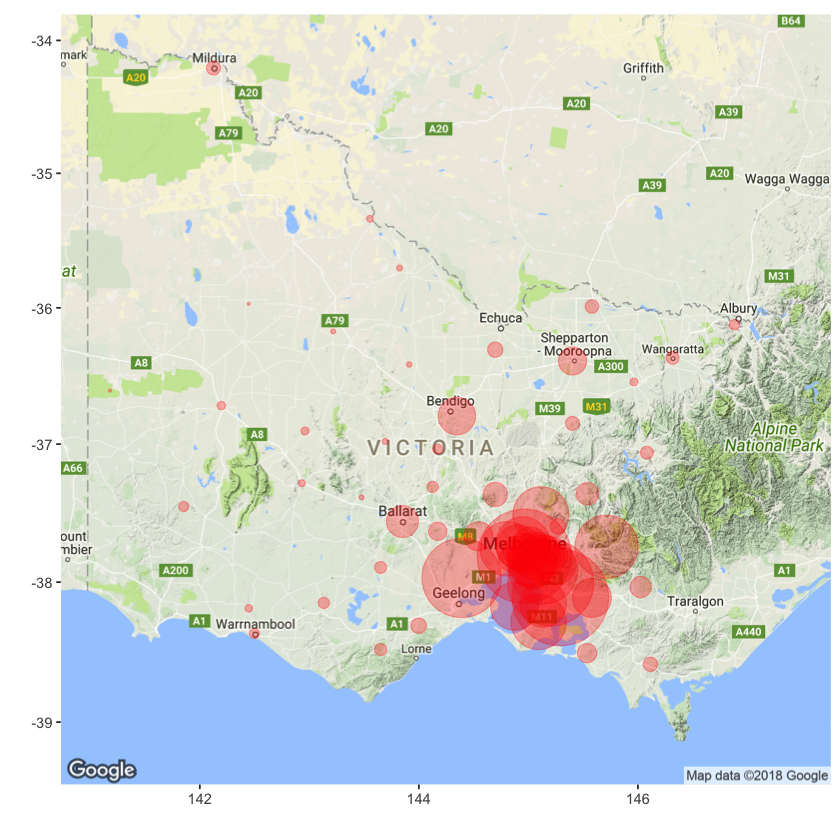

In [235]:
data_table$lon=latlon$lon
data_table$lat=latlon$lat



map <- get_map(location = c(lon = mean(data_table$lon), lat = mean(data_table$lat)), zoom = 7
               , source = "google")

ggmap(map) + geom_point(data=data_table,size=data_table$Freq/50,color="red",alpha=0.3) +
#annotate("text", x = data_table$lon[which(data_table$Freq!=1)], y = data_table$lat[which(data_table$Freq!=1)], 
 #        label = data_table$Freq[which(data_table$Freq!=1)]) + 
xlab("") + ylab("")


In [78]:
#alright, Inner Melbourne seems to be the worse off here. The rural locations have far fewer crashes
#Let's find out what correlates with what. 
#It would be helpful to sum up values for individual locations.

Warning message in cor(newdata):
“the standard deviation is zero”

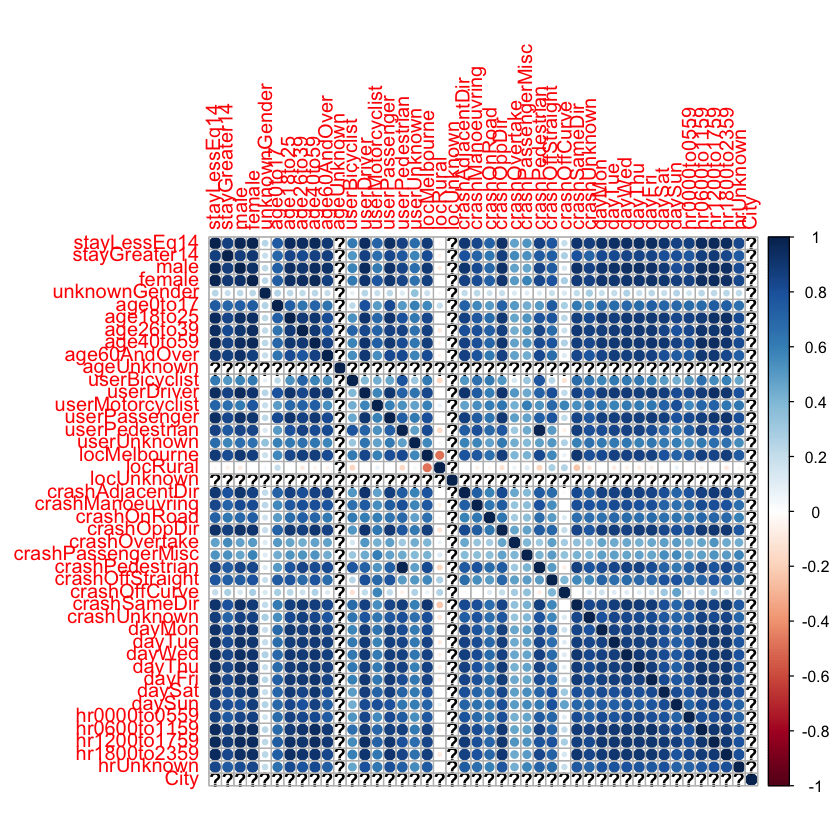

In [247]:
newdata <- data[c(-1:-3)]
newdata$City=0
M <- cor(newdata)
corrplot(M, method = "circle")

In [248]:
#this is unhelpful on many levels. It has too much data, everything seems to be correlated.

In [249]:
cor(newdata) #this gets the linear correlation coefficients between all the variables. Its erasing the geo data. We can see basic trends this way. 
#Women are younger then men and are more likely to be Motorcyclists.
#Crashes in Rural areas appear to be fairly random and infrequent

Warning message in cor(newdata):
“the standard deviation is zero”

stayLessEq14 stayGreater14 male        female      
stayLessEq14        1.00000000   0.86378578    0.97816614 0.9805274730
stayGreater14       0.86378578   1.00000000    0.87068563 0.8919502642
male                0.97816614   0.87068563    1.00000000 0.9284846619
female              0.98052747   0.89195026    0.92848466 1.0000000000
unknownGender       0.24122042   0.19101291    0.22339003 0.2351825116
age0to17            0.75013612   0.70161693    0.73617758 0.7470047451
age18to25           0.95370182   0.84157077    0.93321665 0.9395888731
age26to39           0.94317104   0.82287639    0.90544537 0.9419709472
age40to59           0.96963505   0.85672899    0.94067629 0.9626181187
age60AndOver        0.89792318   0.86498504    0.92105766 0.8670559505
ageUnknown                  NA           NA            NA           NA
userBicyclist       0.62222639   0.51378387    0.58756631 0.6226603572
userDriver          0.94317798   0.85903149    0.95220331 0.9106732678
userMotorcyclist    0.71151136   0.66167509    0.61951253 0.7763966717
userPassenger       0.93018244   0.83718274    0.92335275 0.9092930195
userPedestrian      0.85860502   0.76687458    0.84925844 0.8410457757
userUnknown         0.67152388   0.57276019    0.66241766 0.6502189216
locMelbourne        0.88764625   0.81272785    0.89368273 0.8606394837
locRural           -0.03442937  -0.06068169   -0.08267374 0.0002521424
locUnknown                  NA           NA            NA           NA
crashAdjacentDir    0.89815068   0.79035496    0.90890096 0.8581562075
crashManoeuvring    0.83700324   0.71385086    0.82231075 0.8148789781
crashOnRoad         0.72864532   0.63186482    0.69254171 0.7326819816
crashOppDir         0.92579654   0.86367663    0.92163142 0.9109735910
crashOvertake       0.47996736   0.55250910    0.47016963 0.5064604213
crashPassengerMisc  0.52423734   0.53933386    0.46263329 0.5806828420
crashPedestrian     0.85405436   0.75550156    0.84752329 0.8322868201
crashOffStraight    0.77936203   0.73958822    0.74586894 0.7960716083
crashOffCurve       0.20992722   0.27409675    0.14739040 0.2801403436
crashSameDir        0.91969571   0.79184432    0.92109417 0.8824995625
crashUnknown        0.87685180   0.71400562    0.85125321 0.8533122502
dayMon              0.92665804   0.82999851    0.91374345 0.9103253039
dayTue              0.93105974   0.82825883    0.92192395 0.9096934317
dayWed              0.93803836   0.84118664    0.93018752 0.9166895856
dayThu              0.93506688   0.84390921    0.93203549 0.9115932148
dayFri              0.94222646   0.84089817    0.92740691 0.9260045033
daySat              0.91153820   0.80805522    0.88308917 0.9068846681
daySun              0.85116142   0.80636691    0.80879297 0.8737237670
hr0000to0559        0.86523329   0.76885762    0.84582305 0.8548607424
hr0600to1159        0.95663190   0.86700068    0.94065727 0.9444750694
hr1200to1759        0.96804650   0.88205270    0.95058271 0.9582089471
hr1800to2359        0.95443012   0.83950479    0.93819677 0.9357961415
hrUnknown           0.83875358   0.75851855    0.81793680 0.8334842009
City                        NA           NA            NA           NA
                   unknownGender age0to17  age18to25   age26to39  age40to59  
stayLessEq14       0.24122042    0.7501361  0.95370182  0.9431710  0.96963505
stayGreater14      0.19101291    0.7016169  0.84157077  0.8228764  0.85672899
male               0.22339003    0.7361776  0.93321665  0.9054454  0.94067629
female             0.23518251    0.7470047  0.93958887  0.9419709  0.96261812
unknownGender      1.00000000    0.2586739  0.22473910  0.2151351  0.23220896
age0to17           0.25867392    1.0000000  0.73123749  0.6431320  0.70913728
age18to25          0.22473910    0.7312375  1.00000000  0.8895647  0.90277977
age26to39          0.21513513    0.6431320  0.88956467  1.0000000  0.89758266
age40to59          0.23220896    0.7091373  0.90277977  0.8975827  1.00000000
age60AndOver       0.20279492    0.6490757  

In [250]:
library("Hmisc")
res2 <- rcorr(as.matrix(newdata))
res2
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

                   stayLessEq14 stayGreater14  male female unknownGender
stayLessEq14               1.00          0.86  0.98   0.98          0.24
stayGreater14              0.86          1.00  0.87   0.89          0.19
male                       0.98          0.87  1.00   0.93          0.22
female                     0.98          0.89  0.93   1.00          0.24
unknownGender              0.24          0.19  0.22   0.24          1.00
age0to17                   0.75          0.70  0.74   0.75          0.26
age18to25                  0.95          0.84  0.93   0.94          0.22
age26to39                  0.94          0.82  0.91   0.94          0.22
age40to59                  0.97          0.86  0.94   0.96          0.23
age60AndOver               0.90          0.86  0.92   0.87          0.20
ageUnknown                  NaN           NaN   NaN    NaN           NaN
userBicyclist              0.62          0.51  0.59   0.62          0.09
userDriver                 0.94          0.86  0.95

In [257]:
#This is going to be more easy to digest. Sorted this way, we see the lowest linear correlations. 
#Accidents are much less likely to happen to women in rural locations.
#The p value tells us how much we should actually care about the correlations.
#I'm trying to find the most correlated variables here.

a=flattenCorrMatrix(res2$r, res2$P)

a=as.matrix(a)
#a[order(a[,3]),]

which(a[,4] > 0.9)
a[7,]
b=data.frame(a)
max(which(is.na(as.numeric(b$p))!=TRUE))
a[903,]

b$p=as.numeric(as.character(b$p))
b$cor=as.numeric(as.character(b$cor))

summary(b)

b[order(-b$cor),]
sig_data=b[which(b$p > 0.5),]
high_cor=b[which(b$cor > 0.95),]

[1]   7   8   9  10  15  20  26  33  41  60  61  71  78  83  96 110 125 132
 [19] 141 154 155 156 157 158 159 160 161 162 163 165 166 167 168 169 170 195
 [37] 209 215 229 236 250 258 272 281 288 292 295 298 299 305 312 317 319 321
 [55] 322 323 330 344 350 356 363 370 379 380 381 382 383 384 385 386 387 388
 [73] 390 391 393 394 395 396 397 399 400 401 402 403 404 405 411 425 431 435
 [91] 440 454 460 461 464 470 484 494 501 515 525 533 547 557 566 580 590 600
[109] 614 624 635 649 659 671 685 708 722 732 746 760 770 785 799 809 825 839
[127] 849 866 880 890

row          column             cor               p 
 "stayLessEq14" "unknownGender" " 0.2412204215"  "1.350263e-06"

[1] 903

row          column             cor               p 
 "hr1800to2359"     "hrUnknown" " 0.8043512187"  "0.000000e+00"

            row               column         cor                p          
 stayLessEq14 : 43   City        : 43   Min.   :-0.4864   Min.   :0.00000  
 stayGreater14: 42   hrUnknown   : 42   1st Qu.: 0.5241   1st Qu.:0.00000  
 male         : 41   hr1800to2359: 41   Median : 0.7547   Median :0.00000  
 female       : 40   hr1200to1759: 40   Mean   : 0.6567   Mean   :0.01892  
 unknownGender: 39   hr0600to1159: 39   3rd Qu.: 0.8568   3rd Qu.:0.00000  
 age0to17     : 38   hr0000to0559: 38   Max.   : 0.9879   Max.   :0.99603  
 (Other)      :703   (Other)     :703   NA's   :126       NA's   :126      

row                column          cor       p 
341 userPedestrian     crashPedestrian 0.9879493 0 
4   stayLessEq14       female          0.9805275 0 
2   stayLessEq14       male            0.9781661 0 
29  stayLessEq14       age40to59       0.9696351 0 
781 stayLessEq14       hr1200to1759    0.9680465 0 
32  female             age40to59       0.9626181 0 
784 female             hr1200to1759    0.9582089 0 
742 stayLessEq14       hr0600to1159    0.9566319 0 
821 stayLessEq14       hr1800to2359    0.9544301 0 
16  stayLessEq14       age18to25       0.9537018 0 
69  male               userDriver      0.9522033 0 
783 male               hr1200to1759    0.9505827 0 
745 female             hr0600to1159    0.9444751 0 
67  stayLessEq14       userDriver      0.9431780 0 
22  stayLessEq14       age26to39       0.9431710 0 
789 age40to59          hr1200to1759    0.9429437 0 
596 stayLessEq14       dayFri          0.9422265 0 
25  female             age26to39       0.9419709 0 
31  male               age40to59       0.9406763 0 
744 male               hr0600to1159    0.9406573 0 
750 age40to59          hr0600to1159    0.9405627 0 
19  female             age18to25       0.9395889 0 
823 male               hr1800to2359    0.9381968 0 
529 stayLessEq14       dayWed          0.9380384 0 
793 userDriver         hr1200to1759    0.9366745 0 
824 female             hr1800to2359    0.9357961 0 
562 stayLessEq14       dayThu          0.9350669 0 
18  male               age18to25       0.9332167 0 
827 age18to25          hr1800to2359    0.9328041 0 
564 male               dayThu          0.9320355 0 
⋮   ⋮                  ⋮               ⋮         ⋮ 
917 userMotorcyclist   City            NA        NA
918 userPassenger      City            NA        NA
919 userPedestrian     City            NA        NA
920 userUnknown        City            NA        NA
921 locMelbourne       City            NA        NA
922 locRural           City            NA        NA
923 locUnknown         City            NA        NA
924 crashAdjacentDir   City            NA        NA
925 crashManoeuvring   City            NA        NA
926 crashOnRoad        City            NA        NA
927 crashOppDir        City            NA        NA
928 crashOvertake      City            NA        NA
929 crashPassengerMisc City            NA        NA
930 crashPedestrian    City            NA        NA
931 crashOffStraight   City            NA        NA
932 crashOffCurve      City            NA        NA
933 crashSameDir       City            NA        NA
934 crashUnknown       City            NA        NA
935 dayMon             City            NA        NA
936 dayTue             City            NA        NA
937 dayWed             City            NA        NA
938 dayThu             City            NA        NA
939 dayFri             City            NA        NA
940 daySat             City            NA        NA
941 daySun             City            NA        NA
942 hr0000to0559       City            NA        NA
943 hr0600to1159       City            NA        NA
944 hr1200to1759       City            NA        NA
945 hr1800to2359       City            NA        NA
946 hrUnknown          City            NA        NA

In [259]:
sig_data[order(sig_data$cor),]

row              column           cor           p        
166 userDriver       locRural         -0.0190231548 0.7073106
484 locRural         dayMon           -0.0186771288 0.7123964
435 crashOffCurve    crashSameDir     -0.0086892936 0.8638361
722 locRural         hr0000to0559     -0.0081037455 0.8729313
160 age18to25        locRural         -0.0027333804 0.9569786
209 locRural         crashAdjacentDir -0.0026535968 0.9582332
157 female           locRural          0.0002521424 0.9960296
649 locRural         daySat            0.0043147240 0.9321384
400 crashManoeuvring crashOffCurve     0.0046205320 0.9273415
799 locRural         hr1200to1759      0.0107877643 0.8313964
168 userPassenger    locRural          0.0243245123 0.6311322
399 crashAdjacentDir crashOffCurve     0.0285357401 0.5732379

In [258]:
high_cor[order(high_cor$cor),]

row            column          cor       p
783 male           hr1200to1759    0.9505827 0
69  male           userDriver      0.9522033 0
16  stayLessEq14   age18to25       0.9537018 0
821 stayLessEq14   hr1800to2359    0.9544301 0
742 stayLessEq14   hr0600to1159    0.9566319 0
784 female         hr1200to1759    0.9582089 0
32  female         age40to59       0.9626181 0
781 stayLessEq14   hr1200to1759    0.9680465 0
29  stayLessEq14   age40to59       0.9696351 0
2   stayLessEq14   male            0.9781661 0
4   stayLessEq14   female          0.9805275 0
341 userPedestrian crashPedestrian 0.9879493 0

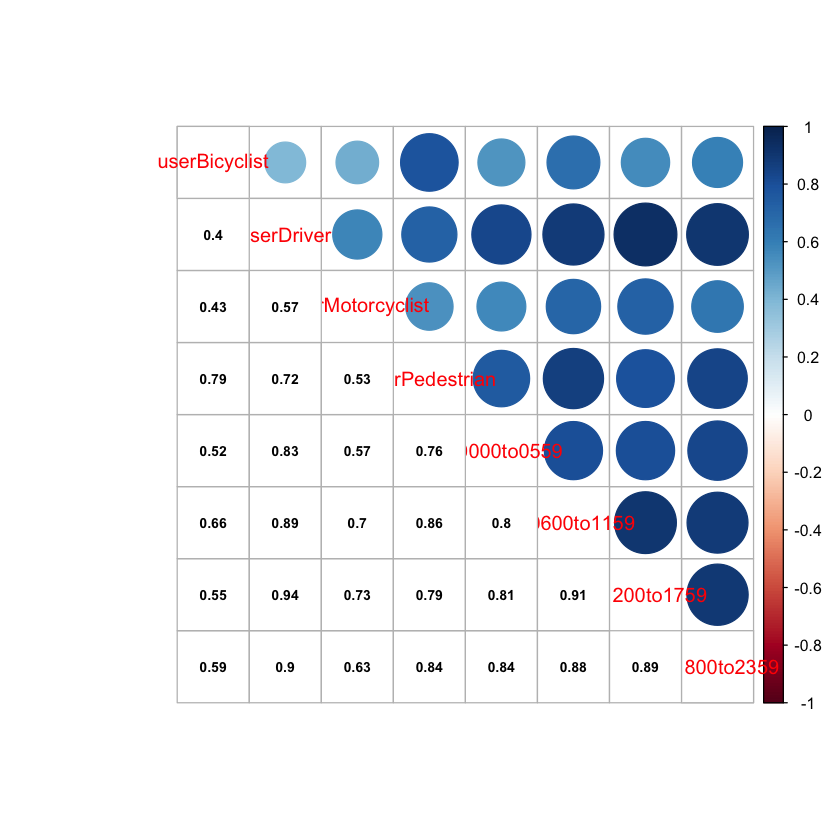

In [243]:
newdata=data[c("userBicyclist","userDriver","userMotorcyclist","userPedestrian","hr0000to0559","hr0600to1159","hr1200to1759","hr1800to2359")]

M <- cor(newdata)
corrplot.mixed(M, lower.col = "black", number.cex = .7)


res2 <- rcorr(as.matrix(newdata))


In [179]:
res2 <- rcorr(as.matrix(newdata))
res2

                 userBicyclist userDriver userMotorcyclist userPedestrian
userBicyclist             1.00       0.40             0.43           0.79
userDriver                0.40       1.00             0.57           0.72
userMotorcyclist          0.43       0.57             1.00           0.53
userPedestrian            0.79       0.72             0.53           1.00
hr0000to0559              0.52       0.83             0.57           0.76
hr0600to1159              0.66       0.89             0.70           0.86
hr1200to1759              0.55       0.94             0.73           0.79
hr1800to2359              0.59       0.90             0.63           0.84
                 hr0000to0559 hr0600to1159 hr1200to1759 hr1800to2359
userBicyclist            0.52         0.66         0.55         0.59
userDriver               0.83         0.89         0.94         0.90
userMotorcyclist         0.57         0.70         0.73         0.63
userPedestrian           0.76         0.86         0.79   

In [180]:
#Ok, time to get serious. Let's answer this question:
#What variables correlate most strongly with crashes in melbourne?

In [295]:
#cleaning the data, making dates number and assigning a numeric value to each LGA in case we need it later.
#Also finding the variables that correlate most strongly with the number of accidents in Melbourne so we can narrow
#down the variables for the fit.
melbourne_data=data[which(data$locMelbourne > 0),]
melbourne_data$total_accidents=melbourne_data$locMelbourne
melbourne_data$dateFrom=as.numeric(melbourne_data$dateFrom)
melbourne_data$dateTo=as.numeric(melbourne_data$dateTo)
lga_code=c(1:length(unique(melbourne_data$LGA)))
lga_unique=unique(melbourne_data$LGA)
melbourne_data$LGA=as.numeric(melbourne_data$LGA)
res2 <- rcorr(as.matrix(melbourne_data))
a=flattenCorrMatrix(res2$r, res2$P)
b=data.frame(a)
b=b[which(b$column=='total_accidents'),]
b[order(-b$cor),]

row                column          cor        p           
1056 locMelbourne       total_accidents 1.00000000 0.000000e+00
1039 stayLessEq14       total_accidents 0.99477446 0.000000e+00
1042 female             total_accidents 0.96846903 0.000000e+00
1041 male               total_accidents 0.95579897 0.000000e+00
1047 age40to59          total_accidents 0.94701185 0.000000e+00
1079 hr1200to1759       total_accidents 0.94323655 0.000000e+00
1045 age18to25          total_accidents 0.92108463 0.000000e+00
1080 hr1800to2359       total_accidents 0.92042471 0.000000e+00
1078 hr0600to1159       total_accidents 0.91465836 0.000000e+00
1053 userPassenger      total_accidents 0.90538205 0.000000e+00
1072 dayWed             total_accidents 0.88847642 0.000000e+00
1074 dayFri             total_accidents 0.88752213 0.000000e+00
1046 age26to39          total_accidents 0.88454723 0.000000e+00
1070 dayMon             total_accidents 0.88402948 0.000000e+00
1062 crashOppDir        total_accidents 0.88275044 0.000000e+00
1051 userDriver         total_accidents 0.87529313 0.000000e+00
1073 dayThu             total_accidents 0.86662216 0.000000e+00
1075 daySat             total_accidents 0.86506919 0.000000e+00
1071 dayTue             total_accidents 0.85804680 0.000000e+00
1068 crashSameDir       total_accidents 0.84959632 0.000000e+00
1076 daySun             total_accidents 0.82087423 0.000000e+00
1059 crashAdjacentDir   total_accidents 0.80537826 0.000000e+00
1069 crashUnknown       total_accidents 0.79649747 0.000000e+00
1040 stayGreater14      total_accidents 0.78466306 0.000000e+00
1081 hrUnknown          total_accidents 0.76977985 0.000000e+00
1048 age60AndOver       total_accidents 0.75716366 0.000000e+00
1077 hr0000to0559       total_accidents 0.75083847 0.000000e+00
1066 crashOffStraight   total_accidents 0.70661001 0.000000e+00
1052 userMotorcyclist   total_accidents 0.69830838 0.000000e+00
1054 userPedestrian     total_accidents 0.68286605 0.000000e+00
1060 crashManoeuvring   total_accidents 0.67731543 0.000000e+00
1065 crashPedestrian    total_accidents 0.67155884 0.000000e+00
1044 age0to17           total_accidents 0.66372226 0.000000e+00
1055 userUnknown        total_accidents 0.62393499 0.000000e+00
1061 crashOnRoad        total_accidents 0.57951108 2.664535e-15
1064 crashPassengerMisc total_accidents 0.50357849 2.407918e-11
1063 crashOvertake      total_accidents 0.39756158 3.018868e-07
1050 userBicyclist      total_accidents 0.31798952 5.529080e-05
1067 crashOffCurve      total_accidents 0.28343163 3.519695e-04
1043 unknownGender      total_accidents 0.19853078 1.327214e-02
1037 dateFrom           total_accidents 0.11178386 1.661208e-01
1038 dateTo             total_accidents 0.11178386 1.661208e-01
1036 LGA                total_accidents 0.05455731 5.001605e-01
1049 ageUnknown         total_accidents        NaN          NaN
1057 locRural           total_accidents        NaN          NaN
1058 locUnknown         total_accidents        NaN          NaN

In [288]:
#We want something useful. Let's use the hospital stay for a proxy of severity of accident. Let's see what factors contribut
#to the most severe accidents in Melbourne

row           column             cor       p           
195  stayGreater14 locMelbourne       0.7846631 0.000000e+00
1040 stayGreater14 total_accidents    0.7846631 0.000000e+00
20   stayGreater14 female             0.7780785 0.000000e+00
908  stayGreater14 hr1200to1759       0.7634256 0.000000e+00
330  stayGreater14 crashOppDir        0.7429714 0.000000e+00
866  stayGreater14 hr0600to1159       0.7324253 0.000000e+00
15   stayGreater14 male               0.7285630 0.000000e+00
785  stayGreater14 daySun             0.7274040 0.000000e+00
60   stayGreater14 age40to59          0.7139339 0.000000e+00
141  stayGreater14 userPassenger      0.7129684 0.000000e+00
110  stayGreater14 userDriver         0.7064184 0.000000e+00
41   stayGreater14 age18to25          0.6978402 0.000000e+00
635  stayGreater14 dayWed             0.6935013 0.000000e+00
71   stayGreater14 age60AndOver       0.6934568 0.000000e+00
708  stayGreater14 dayFri             0.6892796 0.000000e+00
951  stayGreater14 hr1800to2359       0.6766429 0.000000e+00
566  stayGreater14 dayMon             0.6728443 0.000000e+00
671  stayGreater14 dayThu             0.6712677 0.000000e+00
746  stayGreater14 daySat             0.6695609 0.000000e+00
440  stayGreater14 crashOffStraight   0.6660648 0.000000e+00
50   stayGreater14 age26to39          0.6361370 0.000000e+00
600  stayGreater14 dayTue             0.6351068 0.000000e+00
125  stayGreater14 userMotorcyclist   0.6293591 0.000000e+00
33   stayGreater14 age0to17           0.6164585 0.000000e+00
995  stayGreater14 hrUnknown          0.6096211 0.000000e+00
258  stayGreater14 crashAdjacentDir   0.5825441 1.776357e-15
825  stayGreater14 hr0000to0559       0.5728152 6.661338e-15
501  stayGreater14 crashSameDir       0.5704201 9.325873e-15
383  stayGreater14 crashPassengerMisc 0.5504355 1.176836e-13
533  stayGreater14 crashUnknown       0.5080215 1.504308e-11
158  stayGreater14 userPedestrian     0.5004899 3.326139e-11
356  stayGreater14 crashOvertake      0.4953630 5.646084e-11
176  stayGreater14 userUnknown        0.4870667 1.305098e-10
411  stayGreater14 crashPedestrian    0.4784335 3.048690e-10
281  stayGreater14 crashManoeuvring   0.4589295 1.904346e-09
305  stayGreater14 crashOnRoad        0.4038527 1.879106e-07
470  stayGreater14 crashOffCurve      0.3879956 6.093621e-07
26   stayGreater14 unknownGender      0.1591858 4.787918e-02
96   stayGreater14 userBicyclist      0.1389648 8.462287e-02
83   stayGreater14 ageUnknown               NaN          NaN
215  stayGreater14 locRural                 NaN          NaN
236  stayGreater14 locUnknown               NaN          NaN

Warning message in cor(melbourne_data):
“the standard deviation is zero”

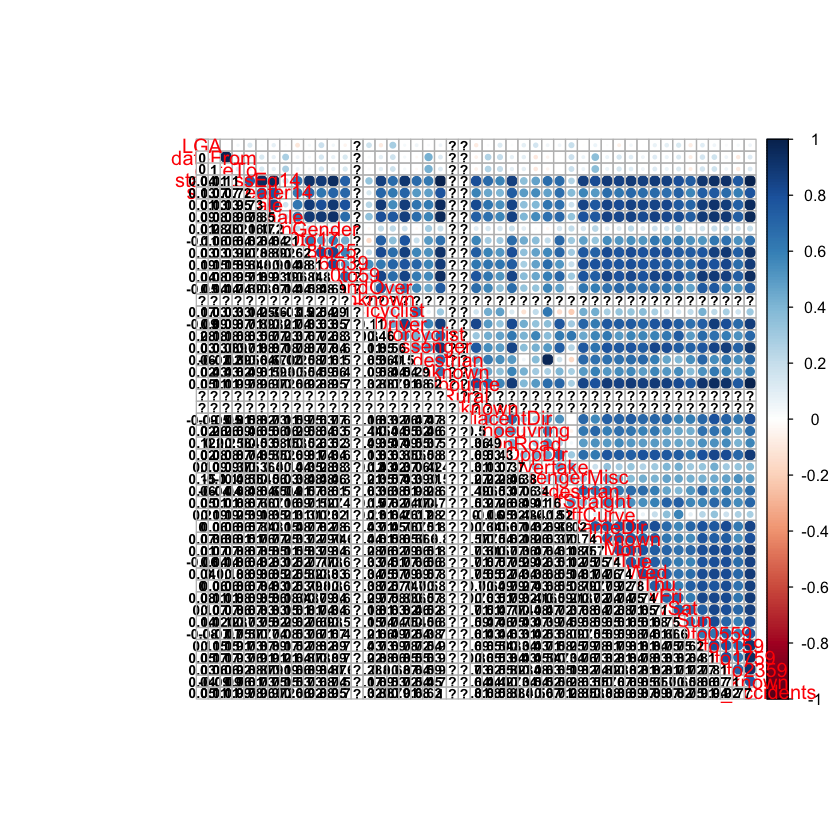

In [305]:
melbourne_data=data[which(data$locMelbourne > 0),]
melbourne_data$total_accidents=melbourne_data$locMelbourne
melbourne_data$dateFrom=as.numeric(melbourne_data$dateFrom)
melbourne_data$dateTo=as.numeric(melbourne_data$dateTo)
lga_code=c(1:length(unique(melbourne_data$LGA)))
lga_unique=unique(melbourne_data$LGA)
melbourne_data$LGA=as.numeric(melbourne_data$LGA)
res2 <- rcorr(as.matrix(melbourne_data))
a=flattenCorrMatrix(res2$r, res2$P)
b=data.frame(a)
b=b[which(b$row=='stayGreater14'),]
b[order(-b$cor),]
M<-cor(melbourne_data)
corrplot.mixed(M, lower.col = "black", number.cex = .7)

In [ ]:
#Definitely during rush hour going the wrong way. This is a definitive course of action: Melbourne needs to improve
#traffic information so that people don't go down the wrong road.

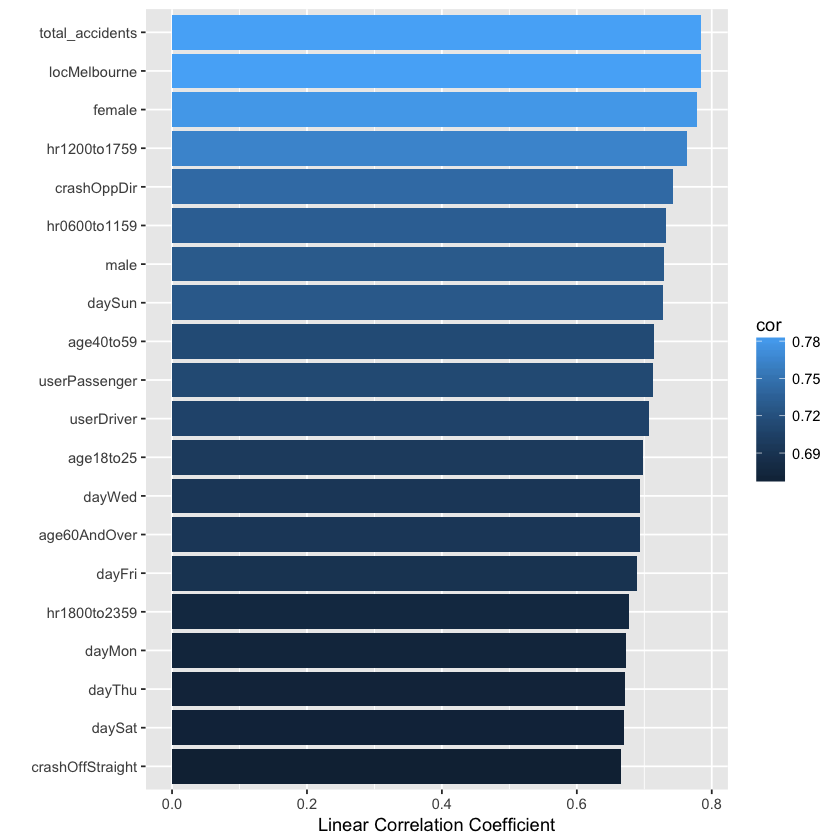

In [327]:
ggplot(data=subset(b,cor>0.65),aes(x=reorder(column,cor),cor ,fill=cor)) + 
geom_col() + coord_flip() + ylab("Linear Correlation Coefficient") +
xlab("")